In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69839_Z')

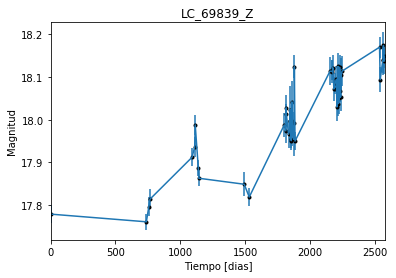

In [2]:
data = np.genfromtxt('LC_69839_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69839_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

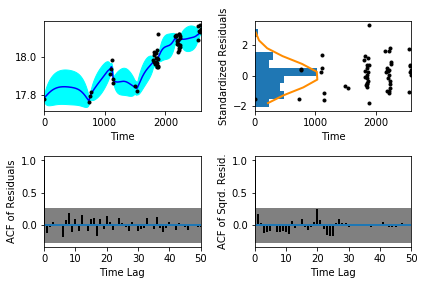

In [5]:
sample.assess_fit()

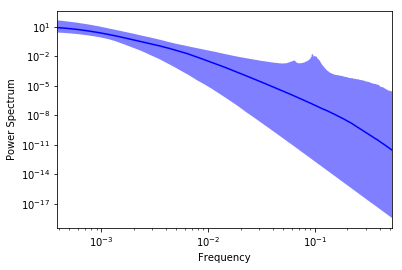

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69839_Z')

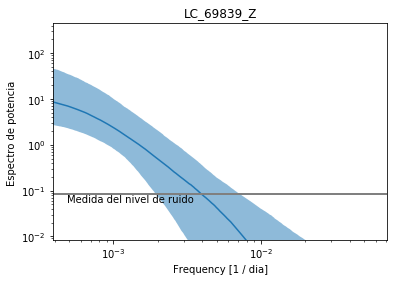

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69839_Z')

Text(0.5,1,'Prediccion , valor esperado LC_69839_Z')

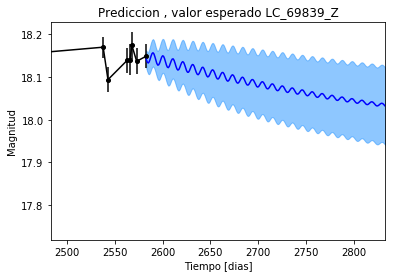

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69839_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_69839_Z')

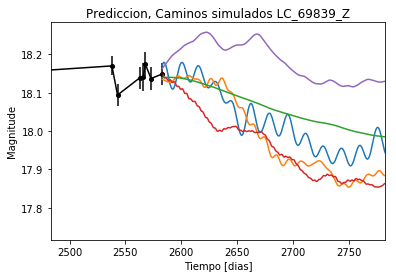

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69839_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69839_Z')

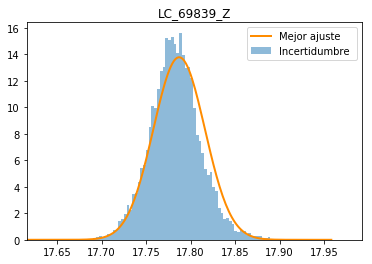

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69839_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_Z')

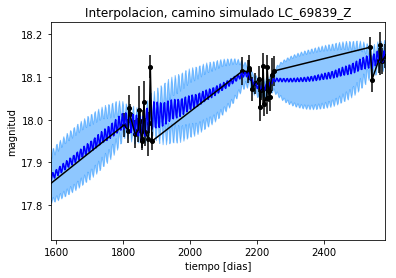

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_Z')

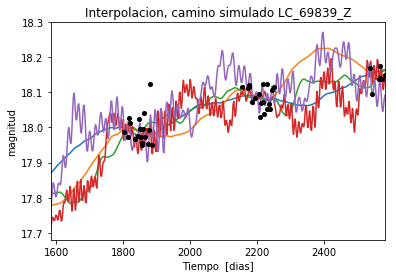

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 408.721888616
Median: 0.010751588554
Standard deviation: 0.188754287441
68% credibility interval: [ 0.00128425  0.16232787]
95% credibility interval: [  4.36894551e-04   7.64212456e-01]
99% credibility interval: [  4.01209503e-04   9.90014257e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 618.50894024
Median: 0.00206852913089
Standard deviation: 0.070650165685
68% credibility interval: [ 0.00054523  0.01633267]
95% credibility interval: [ 0.00040208  0.17422519]
99% credibility interval: [  3.90037262e-04   5.11348979e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 181.197828308
Median: 0.0302772637024
Standard dev

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 158.424544411
Median: 106.255932539
Standard deviation: 2.13224137735
68% credibility interval: [ 104.44269998  107.94134166]
95% credibility interval: [ 102.08739628  111.33826513]
99% credibility interval: [  99.82689302  112.07106955]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 358.088294736
Median: 0.787101118822
Standard deviation: 2.05877922051
68% credibility interval: [ 0.08765342  3.89400315]
95% credibility interval: [ 0.01911441  6.89632283]
99% credibility interval: [ 0.01293072  9.58074945]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 566.578313083
Median: 0.389776569913
Standard deviation: 7.58419616061
68% credibility interval: [ 0.02019566  4.40655529]
95% credibility interval: [  1.11863363e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20028.3698597
Median: 6.91902613255e-35
Standard deviation: 8.32096296322e+94
68% credibility interval: [  3.37211230e-59   6.87140818e-12]
95% credibility interval: [  9.95926470e-126   1.21535041e+001]
99% credibility interval: [  7.90332193e-138   1.22492305e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1964.81796266
Median: 17.9255631423
Standard deviation: 0.0830094888276
68% credibility interval: [ 17.8510894   17.99420882]
95% credibility interval: [ 17.75285571  18.08775481]
99% credibility interval: [ 17.64847623  18.1661004 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 473.786401851
Median: 0.0129469155299
Standard deviation: 0.207264454645
68% credibility interval: [ 0.          0.23601833]
95% credibility interval: [ 0.          0.78567971]
99% credibility interval: [ 0.          0.99035293]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 473.786401851
Median: 0.0129469155299
Standard deviation: 0.207264454645
68% credibility interval: [ 0.          0.23601833]
95% credibility interval: [ 0.          0.78567971]
99% credibility interval: [ 0.          0.99035293]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1578.51003495
Median: 0.0
Standard deviation: 0.000216685741644
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 158.424544411
Median: 106.255932539
Standard deviation: 2.13224137735
68% credibility interval: [ 104.44269998  107.94134166]
95% credibility interval: [ 102.08739628  111.33826513]
99% credibility interval: [  99.82689302  112.07106955]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 661.507420113
Median: 0.0198125901101
Standard deviation: 0.0262051707711
68% credibility interval: [ 0.01145687  0.04141208]
95% credibility interval: [ 0.00746127  0.09200648]
99% credibility interval: [ 0.00608749  0.15426886]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 251.255191888
Median: 1.26681225857
Standard deviation: 0.24520725815
68% credibility interval: [ 1.03806481  1.51735079]
95% credibility interval: [ 0.78157463  1.7721555 ]
99% credibility interval: [ 0.67465911  1.92471903]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 403.401762945
Median: 0.000188754495832
Standard deviation: 0.117565254954
68% credibility interval: [  2.11444534e-06   5.57496391e-03]
95% credibility interval: [  5.75113421e-08   1.69961184e-01]
99% credibility interval: [  6.97876508e-09   6.61821322e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 408.721888616
Median: (-0.067554223231-2.23732467904j)
Standard deviation: 1.76138580381
68% credibility interval: [-1.0199361-0.90120834j -0.0080692-0.09000973j]
95% credibility interval: [ -4.80168847e+00+0.j          -2.74508942e-03-0.59107053j]
99% credibility interval: [ -6.22044303e+00-3.47954203j  -2.52087365e-03-1.83335098j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 618.50894024
Median: (-0.0129969518427+1.3954281948j)
Standard deviation: 1.37585977735
68% credibility interval: [-0.10262117+0.21083271j -0.00342577+0.03188636j]
95% credibility interval: [-1.09468913+3.31930145j -0.00252636+0.j        ]
99% credibility interval: [ -3.21290039e+00+2.07668842j  -2.45067640e-03+0.j        ]
Posterior summary f